In [1]:
import os
from sqlalchemy import create_engine

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
USER = os.environ.get('USER')
PWD = os.environ.get('PWD')
HOST = os.environ.get('HOST')
PORT = int(os.environ.get('PORT') or 3306)
DB = os.environ.get('DB')

con = create_engine(
    f"mysql+mysqlconnector://{USER}:{PWD}@{HOST}:{PORT}/{DB}"
)

In [3]:
df = pd.read_sql_query("""
select concat("Match - ", row_number() over(order by ID)) as 'match_no',
	sum(batsman_run) as 'runs_scored',
    round(avg(sum(batsman_run)) over(rows between unbounded preceding and current row), 2) as 'career_avg',
    round(avg(sum(batsman_run)) over(rows between 9 preceding and current row), 2) as 'rolling_avg_10',
	sum(sum(batsman_run)) over(rows between unbounded preceding and current row) as 'career_runs'
from ipl
where batter = "V Kohli"
group by ID;
""", con=con)

df.head()

,match_no,runs_scored,career_avg,rolling_avg_10,career_runs
0,Match - 1,1.0,1.00,1.00,1.0
1,Match - 2,23.0,12.00,12.00,24.0
2,Match - 3,13.0,12.33,12.33,37.0
3,Match - 4,12.0,12.25,12.25,49.0
4,Match - 5,1.0,10.00,10.00,50.0


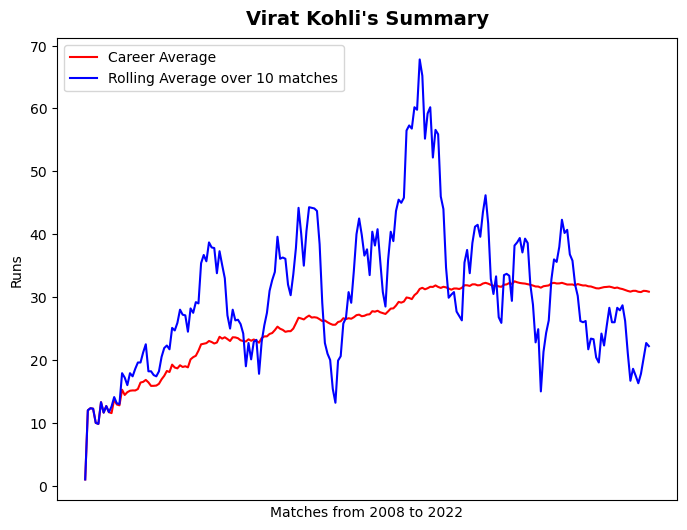

In [4]:
plt.figure(figsize=(8, 6))

plt.plot(df['match_no'], df['career_avg'], c='red', label="Career Average")
plt.plot(df['match_no'], df['rolling_avg_10'], c='blue', label="Rolling Average over 10 matches")

plt.title("Virat Kohli's Summary", fontweight='bold', fontsize=14, pad=10)
plt.ylabel("Runs")
plt.xlabel("Matches from 2008 to 2022")

plt.xticks([])
plt.legend()

plt.show()